In [1]:
import random as rd

Variant = 4
rd.seed(Variant)

Numbers_of_problems = [i+1 for i in rd.sample(range(14),3)]
Numbers_of_problems

[4, 5, 2]

Задание 1

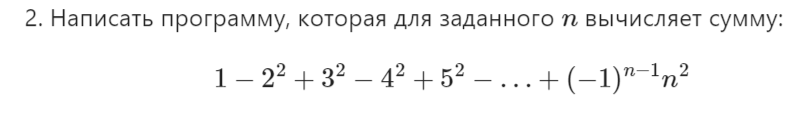

test.asm

In [ ]:
format ELF64
public _start
public calcuate_sum

include 'help.asm'
include 'calcuator.asm'

section '.data'
symbol db '-'

section '.bss' writable
    place rb 255
    answer rb 2
    
section '.text' executable
_start:
    mov rsi, place
    call input_keyboard
    call str_number
    call calcuate_sum
    test rdi, 8000h
    jz .non_negative
    call print_minus
    neg rdi
    .non_negative:
    mov rax, rdi
    mov rsi, answer
    call number_str
    call print_str
    call new_line
    call exit

calcuator.asm

In [ ]:
calcuate_sum:
    push rax
    push rbx
    mov rbx, rax
    mov rdi, 0

    .loop:
        mov rax, rbx
        mul rax
        test rbx, 1
        jnz .skip_minus
        neg rax
        .skip_minus:
        add rdi, rax
        dec rbx
        jnz .loop

    pop rbx
    pop rax

    ret


help.asm

In [ ]:
exit:
     mov rax, 60
     mov rdi, 0
     syscall

print_minus:
    push rdi
    push rsi
    push rdx
    push rax
    mov rdi, 1
    mov rsi, symbol
    mov rdx, 1
    mov rax, 1
    syscall
    pop rax
    pop rdx
    pop rsi
    pop rdi
    ret

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret


;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx

    xor rax,rax
    xor rcx,rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je      .restore
    mov     rbx, 10
    div     rbx

.restore:
    pop rbx
    pop rcx
    ret

;The function converts the nubmer to string
;input rax - number
;rsi -address of begin of string
number_str:
  push rbx
  push rcx
  push rdx
  xor rcx, rcx
  mov rbx, 10
  .loop_1:
    xor rdx, rdx
    div rbx
    add rdx, 48
    push rdx
    inc rcx
    cmp rax, 0
    jne .loop_1
  xor rdx, rdx
  .loop_2:
    pop rax
    mov byte [rsi+rdx], al
    inc rdx
    dec rcx
    cmp rcx, 0
  jne .loop_2
  mov byte [rsi+rdx], 0   
  pop rdx
  pop rcx
  pop rbx
  ret


;The function realizates user input from the keyboard
;input: rsi - place of memory saved input string 
input_keyboard:
  push rax
  push rdi
  push rdx

  mov rax, 0
  mov rdi, 0
  mov rdx, 255
  syscall

  xor rcx, rcx
  .loop:
     mov al, [rsi+rcx]
     inc rcx
     cmp rax, 0x0A
     jne .loop
  dec rcx
  mov byte [rsi+rcx], 0
  
  pop rdx
  pop rdi
  pop rax
  ret

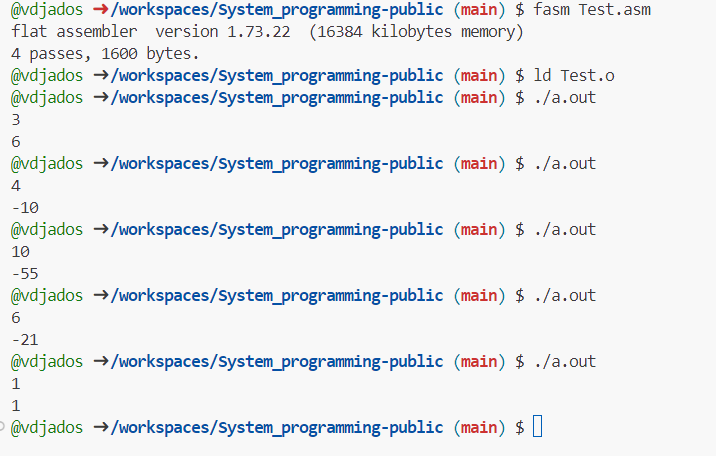

Задание 2

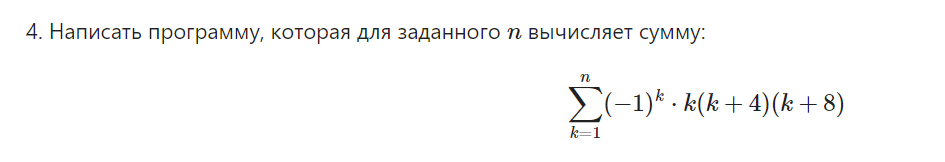

Структура кода ткаакя же, как в задании 1. Нужно поменять только функцию calcuate_sum. В итоге получим:

Test.asm

In [ ]:
format ELF64
public _start
public calcuate_sum

include 'help.asm'
include 'calcuator.asm'

section '.data'
symbol db '-'

section '.bss' writable
    place rb 255
    answer rb 2
    
section '.text' executable
_start:
    mov rsi, place
    call input_keyboard
    call str_number
    call calcuate_sum
    test rdi, 8000h
    jz .non_negative
    call print_minus
    neg rdi
    .non_negative:
    mov rax, rdi
    mov rsi, answer
    call number_str
    call print_str
    call new_line
    call exit

calcuator.asm

In [ ]:
calcuate_sum:
    push rax
    push rbx
    push rcx
    mov rbx, rax

    mov rdi, 0

    .loop:
        mov rax, rbx
        mov rcx, rax
        add rcx, 4
        mul rcx
        add rcx, 4
        mul rcx
        test rbx, 1
        jz .skip_minus
        neg rax
        .skip_minus:
        add rdi, rax
        dec rbx
        jnz .loop
    pop rcx
    pop rbx
    pop rax

    ret


help.asm

In [ ]:
exit:
     mov rax, 60
     mov rdi, 0
     syscall

print_minus:
    push rdi
    push rsi
    push rdx
    push rax
    mov rdi, 1
    mov rsi, symbol
    mov rdx, 1
    mov rax, 1
    syscall
    pop rax
    pop rdx
    pop rsi
    pop rdi
    ret

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret


;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx

    xor rax,rax
    xor rcx,rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je      .restore
    mov     rbx, 10
    div     rbx

.restore:
    pop rbx
    pop rcx
    ret

;The function converts the nubmer to string
;input rax - number
;rsi -address of begin of string
number_str:
  push rbx
  push rcx
  push rdx
  xor rcx, rcx
  mov rbx, 10
  .loop_1:
    xor rdx, rdx
    div rbx
    add rdx, 48
    push rdx
    inc rcx
    cmp rax, 0
    jne .loop_1
  xor rdx, rdx
  .loop_2:
    pop rax
    mov byte [rsi+rdx], al
    inc rdx
    dec rcx
    cmp rcx, 0
  jne .loop_2
  mov byte [rsi+rdx], 0   
  pop rdx
  pop rcx
  pop rbx
  ret


;The function realizates user input from the keyboard
;input: rsi - place of memory saved input string 
input_keyboard:
  push rax
  push rdi
  push rdx

  mov rax, 0
  mov rdi, 0
  mov rdx, 255
  syscall

  xor rcx, rcx
  .loop:
     mov al, [rsi+rcx]
     inc rcx
     cmp rax, 0x0A
     jne .loop
  dec rcx
  mov byte [rsi+rcx], 0
  
  pop rdx
  pop rdi
  pop rax
  ret

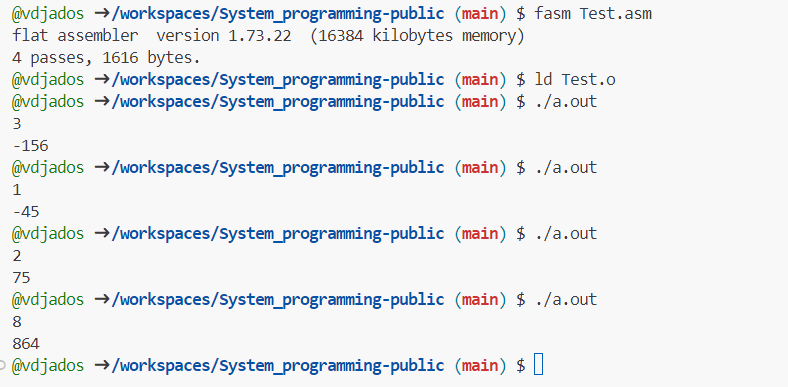

Задание 3

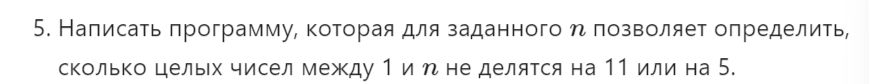

Теперь уберём проверку на отрицательность, т.к. количество чисел - натуральное число, а функцию calcuate_sum перепишем и заменим её на calcuate_numbers. Искать числа будем просто перебором, проверяя, что очередное число не делится на 11 или на 5.

Test.asm

In [ ]:
format ELF64
public _start
public calcuate_numbers

include 'help.asm'
include 'calcuator.asm'

section '.data'
symbol db '-'

section '.bss' writable
    place rb 255
    answer rb 2
    
section '.text' executable
_start:
    mov rsi, place
    call input_keyboard
    call str_number
    call calcuate_numbers
    mov rax, rdi
    mov rsi, answer
    call number_str
    call print_str
    call new_line
    call exit

calcuator.asm

In [ ]:
calcuate_numbers:
    push rax
    push rbx
    push rcx
    push rdx
    mov rbx, rax

    mov rdi, 0

    .loop:
        mov rdx, 0
        mov rax, 0
        mov rcx, 5
        mov rax, rbx
        div rcx
        cmp rdx, 0
        jnz .not_del
        
        mov rdx, 0
        mov rax, rbx
        mov rcx, 11
        div rcx
        cmp rdx, 0
        jnz .not_del

        dec rbx
        jnz .loop

        .not_del:
            inc rdi
            dec rbx
            jnz .loop
        
    pop rdx
    pop rcx
    pop rbx
    pop rax

    ret


help.asm

In [ ]:
exit:
     mov rax, 60
     mov rdi, 0
     syscall

print_minus:
    push rdi
    push rsi
    push rdx
    push rax
    mov rdi, 1
    mov rsi, symbol
    mov rdx, 1
    mov rax, 1
    syscall
    pop rax
    pop rdx
    pop rsi
    pop rdi
    ret

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret


;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx

    xor rax,rax
    xor rcx,rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je      .restore
    mov     rbx, 10
    div     rbx

.restore:
    pop rbx
    pop rcx
    ret

;The function converts the nubmer to string
;input rax - number
;rsi -address of begin of string
number_str:
  push rbx
  push rcx
  push rdx
  xor rcx, rcx
  mov rbx, 10
  .loop_1:
    xor rdx, rdx
    div rbx
    add rdx, 48
    push rdx
    inc rcx
    cmp rax, 0
    jne .loop_1
  xor rdx, rdx
  .loop_2:
    pop rax
    mov byte [rsi+rdx], al
    inc rdx
    dec rcx
    cmp rcx, 0
  jne .loop_2
  mov byte [rsi+rdx], 0   
  pop rdx
  pop rcx
  pop rbx
  ret


;The function realizates user input from the keyboard
;input: rsi - place of memory saved input string 
input_keyboard:
  push rax
  push rdi
  push rdx

  mov rax, 0
  mov rdi, 0
  mov rdx, 255
  syscall

  xor rcx, rcx
  .loop:
     mov al, [rsi+rcx]
     inc rcx
     cmp rax, 0x0A
     jne .loop
  dec rcx
  mov byte [rsi+rcx], 0
  
  pop rdx
  pop rdi
  pop rax
  ret

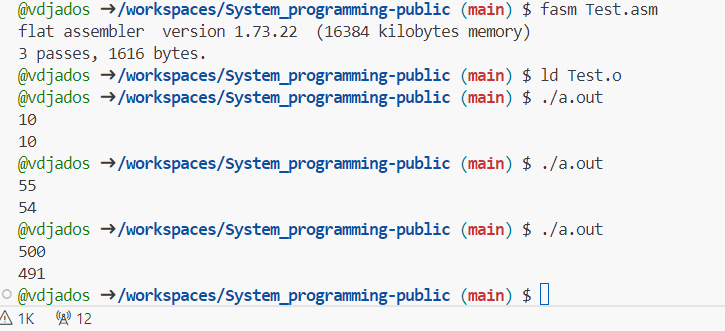